In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import numpy as np

sns.set(style='whitegrid', font_scale=1.2)
rcParams['figure.figsize'] = 12, 7

In [97]:
def to_date(x):
    try:
        year = int(x)
        return f"1-1-{year}"
    except ValueError:
        pass

In [115]:
dtype_dict = {
    'na_sales': np.float16,
    'eu_sales': np.float16,
    'jp_sales': np.float16,
    'other_sales': np.float16,
    'global_sales': np.float16,
    'rank': np.int16
}

In [120]:
df = pd.read_csv('vgsales.csv')
df.columns = map(str.lower, df.columns)
df['year'] = df['year'].apply(to_date)
df['year'] = pd.to_datetime(df['year'])
df = df.astype(dtype_dict)
df.head()

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006-01-01,Sports,Nintendo,41.500000,29.015625,3.769531,8.460938,82.7500
1,2,Super Mario Bros.,NES,1985-01-01,Platform,Nintendo,29.078125,3.580078,6.808594,0.770020,40.2500
2,3,Mario Kart Wii,Wii,2008-01-01,Racing,Nintendo,15.851562,12.882812,3.789062,3.310547,35.8125
3,4,Wii Sports Resort,Wii,2009-01-01,Sports,Nintendo,15.750000,11.007812,3.279297,2.960938,33.0000
4,5,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,Nintendo,11.273438,8.890625,10.218750,1.000000,31.3750


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   rank          16598 non-null  int16         
 1   name          16598 non-null  object        
 2   platform      16598 non-null  object        
 3   year          16327 non-null  datetime64[ns]
 4   genre         16598 non-null  object        
 5   publisher     16540 non-null  object        
 6   na_sales      16598 non-null  float16       
 7   eu_sales      16598 non-null  float16       
 8   jp_sales      16598 non-null  float16       
 9   other_sales   16598 non-null  float16       
 10  global_sales  16598 non-null  float16       
dtypes: datetime64[ns](1), float16(5), int16(1), object(4)
memory usage: 843.0+ KB


### OBJECTIVES
- Distribution of sales accross all regions
- Which year had the most games created
- Top and worst 5 games by sales
- Top 5 publishers by sales (has option for selecting region)
- Top 5 platforms by sales
- Top 5 genre by sales
- Sales by region

In [3]:
sales = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales']]
sales.describe()

,na_sales,eu_sales,jp_sales,other_sales,global_sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,0.264667,0.146652,0.077782,0.048063,0.537441
std,0.816683,0.505351,0.309291,0.188588,1.555028
min,0.000000,0.000000,0.000000,0.000000,0.010000
25%,0.000000,0.000000,0.000000,0.000000,0.060000
50%,0.080000,0.020000,0.000000,0.010000,0.170000
75%,0.240000,0.110000,0.040000,0.040000,0.470000
max,41.490000,29.020000,10.220000,10.570000,82.740000


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   rank          16291 non-null  int16         
 1   name          16291 non-null  object        
 2   platform      16291 non-null  object        
 3   year          16291 non-null  datetime64[ns]
 4   genre         16291 non-null  object        
 5   publisher     16291 non-null  object        
 6   na_sales      16291 non-null  float16       
 7   eu_sales      16291 non-null  float16       
 8   jp_sales      16291 non-null  float16       
 9   other_sales   16291 non-null  float16       
 10  global_sales  16291 non-null  float16       
 11  total_sales   16291 non-null  float64       
dtypes: datetime64[ns](1), float16(5), float64(1), int16(1), object(4)
memory usage: 1.1+ MB


In [126]:
df.isnull().sum()

rank            0
name            0
platform        0
year            0
genre           0
publisher       0
na_sales        0
eu_sales        0
jp_sales        0
other_sales     0
global_sales    0
dtype: int64

In [124]:
df.dropna(inplace=True)

<AxesSubplot:>

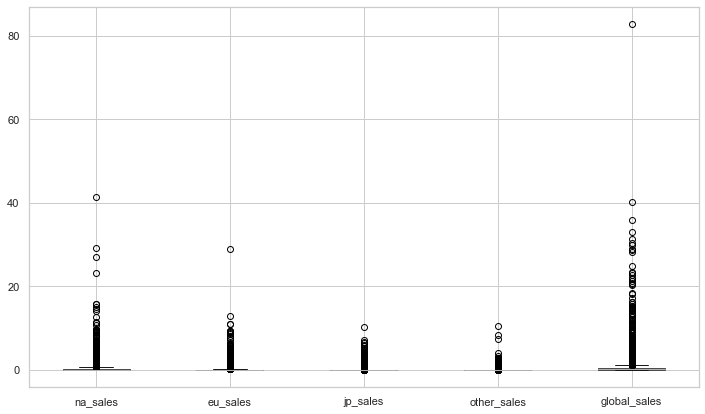

In [7]:
sales.boxplot()

<AxesSubplot:>

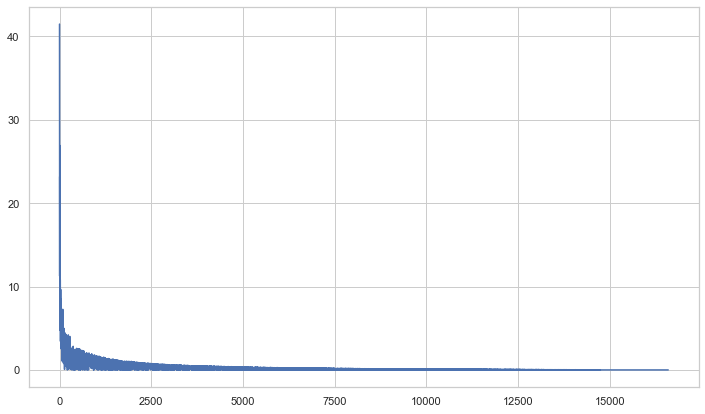

In [8]:
sales['na_sales'].plot()

<AxesSubplot:>

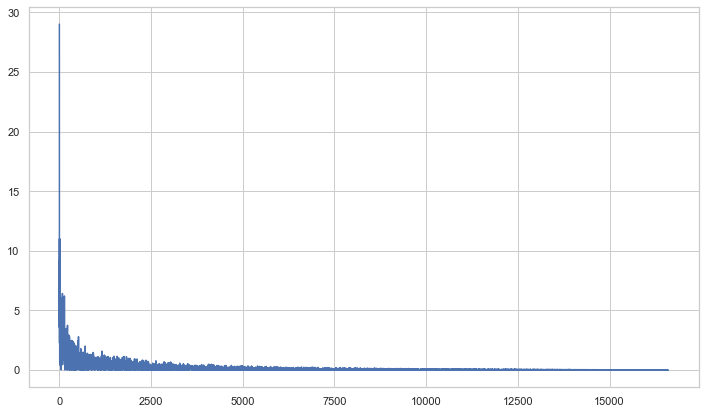

In [9]:
sales['eu_sales'].plot()

<AxesSubplot:>

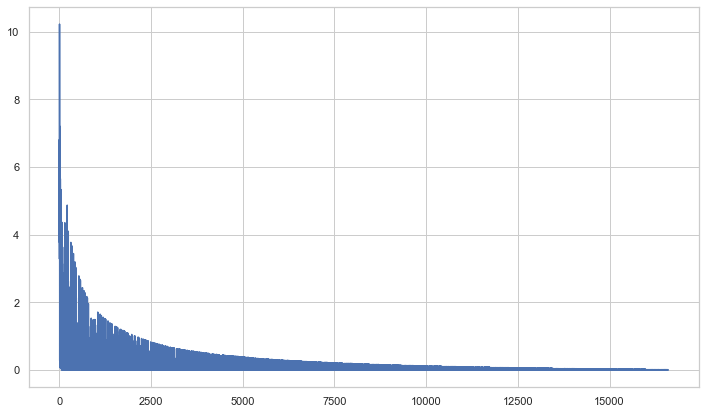

In [10]:
sales['jp_sales'].plot()

<AxesSubplot:>

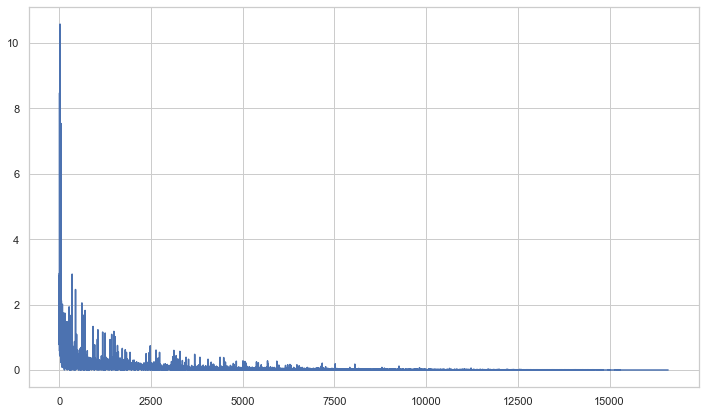

In [11]:
sales['other_sales'].plot()

<AxesSubplot:>

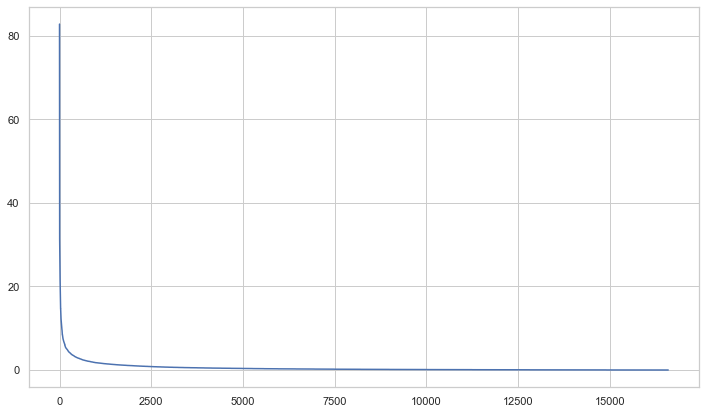

In [12]:
sales['global_sales'].plot()

In [13]:
df.columns

Index(['rank', 'name', 'platform', 'year', 'genre', 'publisher', 'na_sales',
       'eu_sales', 'jp_sales', 'other_sales', 'global_sales'],
      dtype='object')

In [127]:
df['total_sales'] = df.apply(lambda x: x[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales']].sum(), axis=1)

In [128]:
df.head()

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,total_sales
0,1,Wii Sports,Wii,2006-01-01,Sports,Nintendo,41.500000,29.015625,3.769531,8.460938,82.7500,165.496094
1,2,Super Mario Bros.,NES,1985-01-01,Platform,Nintendo,29.078125,3.580078,6.808594,0.770020,40.2500,80.486816
2,3,Mario Kart Wii,Wii,2008-01-01,Racing,Nintendo,15.851562,12.882812,3.789062,3.310547,35.8125,71.646484
3,4,Wii Sports Resort,Wii,2009-01-01,Sports,Nintendo,15.750000,11.007812,3.279297,2.960938,33.0000,65.998047
4,5,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,Nintendo,11.273438,8.890625,10.218750,1.000000,31.3750,62.757812


In [16]:
def pivot_table(index, aggfunc='sum'):
    pivot = df.pivot_table(
        index=index, 
        values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales', 'total_sales'], 
        aggfunc=aggfunc
    )
    return pivot.sort_values(by='total_sales', ascending=False)

In [17]:
def pivot_filter(index, region, aggfunc='sum'):
    pivot = df.pivot_table(
        index=index, 
        values=[region], 
        aggfunc=aggfunc
    )
    return pivot.sort_values(by=region, ascending=False)

In [18]:
pivot_filter('platform', 'eu_sales')

,eu_sales
platform,
PS3,343.71
PS2,339.29
X360,280.58
Wii,268.38
PS,213.60
DS,194.65
PC,139.68
PS4,123.70
GBA,75.25


In [19]:
pivot_table('platform')

,eu_sales,global_sales,jp_sales,na_sales,other_sales,total_sales
platform,,,,,,
PS2,339.29,1255.64,139.20,583.84,193.44,2511.41
X360,280.58,979.96,12.43,601.05,85.54,1959.56
PS3,343.71,957.84,79.99,392.26,141.93,1915.73
Wii,268.38,926.71,69.35,507.71,80.61,1852.76
DS,194.65,822.49,175.57,390.71,60.53,1643.95
PS,213.60,730.66,139.82,336.51,40.91,1461.50
GBA,75.25,318.50,47.33,187.54,7.73,636.35
PSP,68.25,296.28,76.79,108.99,42.19,592.50
PS4,123.70,278.10,14.30,96.80,43.36,556.26


In [20]:
pivot_table('genre')

,eu_sales,global_sales,jp_sales,na_sales,other_sales,total_sales
genre,,,,,,
Action,525.00,1751.18,159.95,877.83,187.38,3501.34
Sports,376.85,1330.93,135.37,683.35,134.97,2661.47
Shooter,313.27,1037.37,38.28,582.60,102.69,2074.21
Role-Playing,188.06,927.37,352.31,327.28,59.61,1854.63
Platform,201.63,831.37,130.77,447.05,51.59,1662.41
Misc,215.98,809.96,107.76,410.24,75.32,1619.26
Racing,238.39,732.04,56.69,359.42,77.27,1463.81
Fighting,101.32,448.91,87.35,223.59,36.68,897.85
Simulation,113.38,392.20,63.70,183.31,31.52,784.11


In [21]:
pivot_table('publisher').head(10)

,eu_sales,global_sales,jp_sales,na_sales,other_sales,total_sales
publisher,,,,,,
Nintendo,418.74,1786.56,455.42,816.87,95.33,3572.92
Electronic Arts,371.27,1110.32,14.04,595.07,129.77,2220.47
Activision,215.53,727.46,6.54,429.70,75.34,1454.57
Sony Computer Entertainment,187.72,607.50,74.10,265.22,80.45,1214.99
Ubisoft,163.32,474.72,7.50,253.43,50.26,949.23
Take-Two Interactive,118.14,399.54,5.83,220.49,55.24,799.24
THQ,94.73,340.77,5.01,208.77,32.14,681.42
Konami Digital Entertainment,69.69,283.64,91.30,92.16,30.31,567.10
Sega,82.00,272.99,57.03,109.40,24.52,545.94


In [22]:
sales.head()

,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,41.49,29.02,3.77,8.46,82.74
1,29.08,3.58,6.81,0.77,40.24
2,15.85,12.88,3.79,3.31,35.82
3,15.75,11.01,3.28,2.96,33.00
4,11.27,8.89,10.22,1.00,31.37


In [23]:
sales = sales.melt(var_name='region', value_name='sales')

In [24]:
sales.head()

,region,sales
0,na_sales,41.49
1,na_sales,29.08
2,na_sales,15.85
3,na_sales,15.75
4,na_sales,11.27


In [25]:
sales_sum = sales.groupby(by='region').sum()
sales_sum

,sales
region,
eu_sales,2434.13
global_sales,8920.44
jp_sales,1291.02
na_sales,4392.95
other_sales,797.75


<AxesSubplot:xlabel='region'>

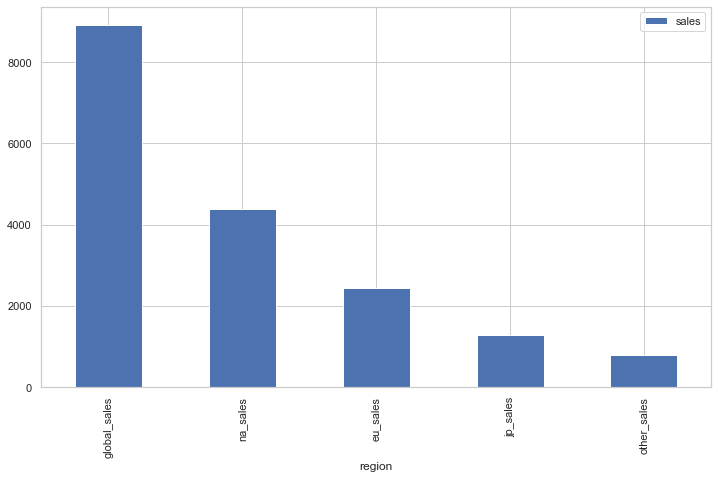

In [26]:
sales_sum.sort_values(by='sales', ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='region', ylabel='sales'>

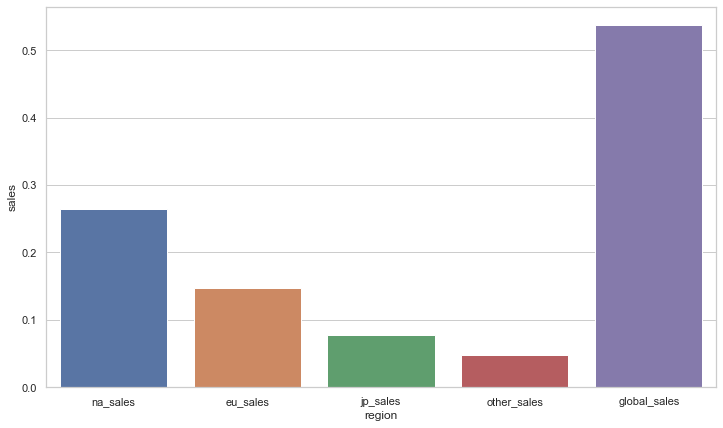

In [27]:
sns.barplot(x='region', y='sales', ci=None, data=sales)

In [28]:
df.groupby(by='year').count().sort_values('total_sales', ascending=False)['rank']

year
2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
2012.0     657
2015.0     614
2014.0     582
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     344
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1987.0      16
1990.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: rank, dtype: int64

In [32]:
df.head()

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,total_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,165.48
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,80.48
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,71.65
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,66.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,62.75


In [34]:
len(df['name'].unique())

11493

In [137]:
max_sales_by_year = df.total_sales.max() + 1

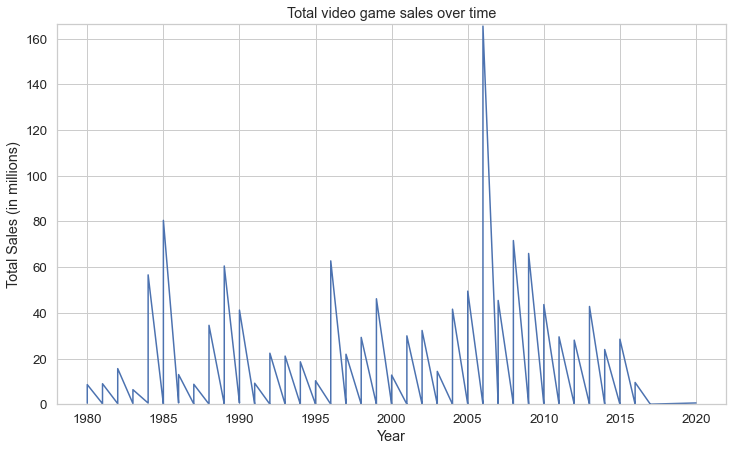

In [143]:
ax = sns.lineplot(data=df, x='year', y='total_sales', ci=None, estimator=None)
ax.set_ylim(0, max_sales_by_year)
ax.set(ylabel="Total Sales (in millions)", xlabel='Year', title='Total video game sales over time')
plt.show()

In [148]:
def get_cat(*args, **kwargs):
    cat = pivot_table(*args, **kwargs)['total_sales'].to_frame()
    return cat.reset_index()

In [149]:
platform = get_cat('platform')
platform.head()

,platform,total_sales
0,PS2,2467.010857
1,X360,1938.881332
2,PS3,1898.749428
3,Wii,1819.043106
4,DS,1636.823799


In [164]:
def cat_plot(cat, *args, **kwargs):
    cat_df = get_cat(cat, *args, **kwargs)
    ax = sns.barplot(data=cat_df, x='total_sales', y=cat)
    ax.set(xlabel='Total Sales (in million)', ylabel='', title=f'Total Sales by {cat}')
    return ax

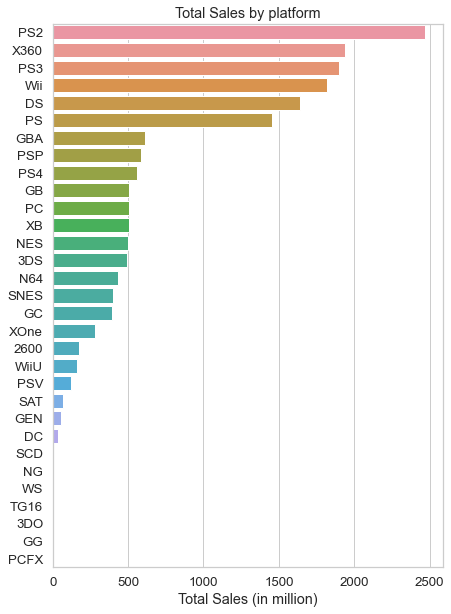

In [165]:
plt.figure(figsize=(7, 10))
cat_plot('platform')
plt.show()

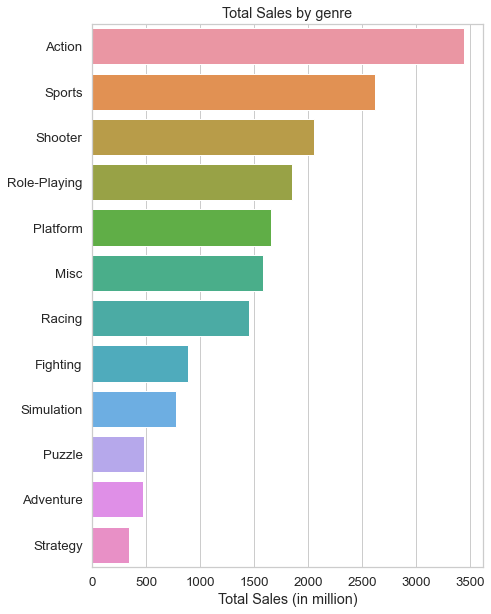

In [166]:
plt.figure(figsize=(7, 10))
cat_plot('genre')
plt.show()